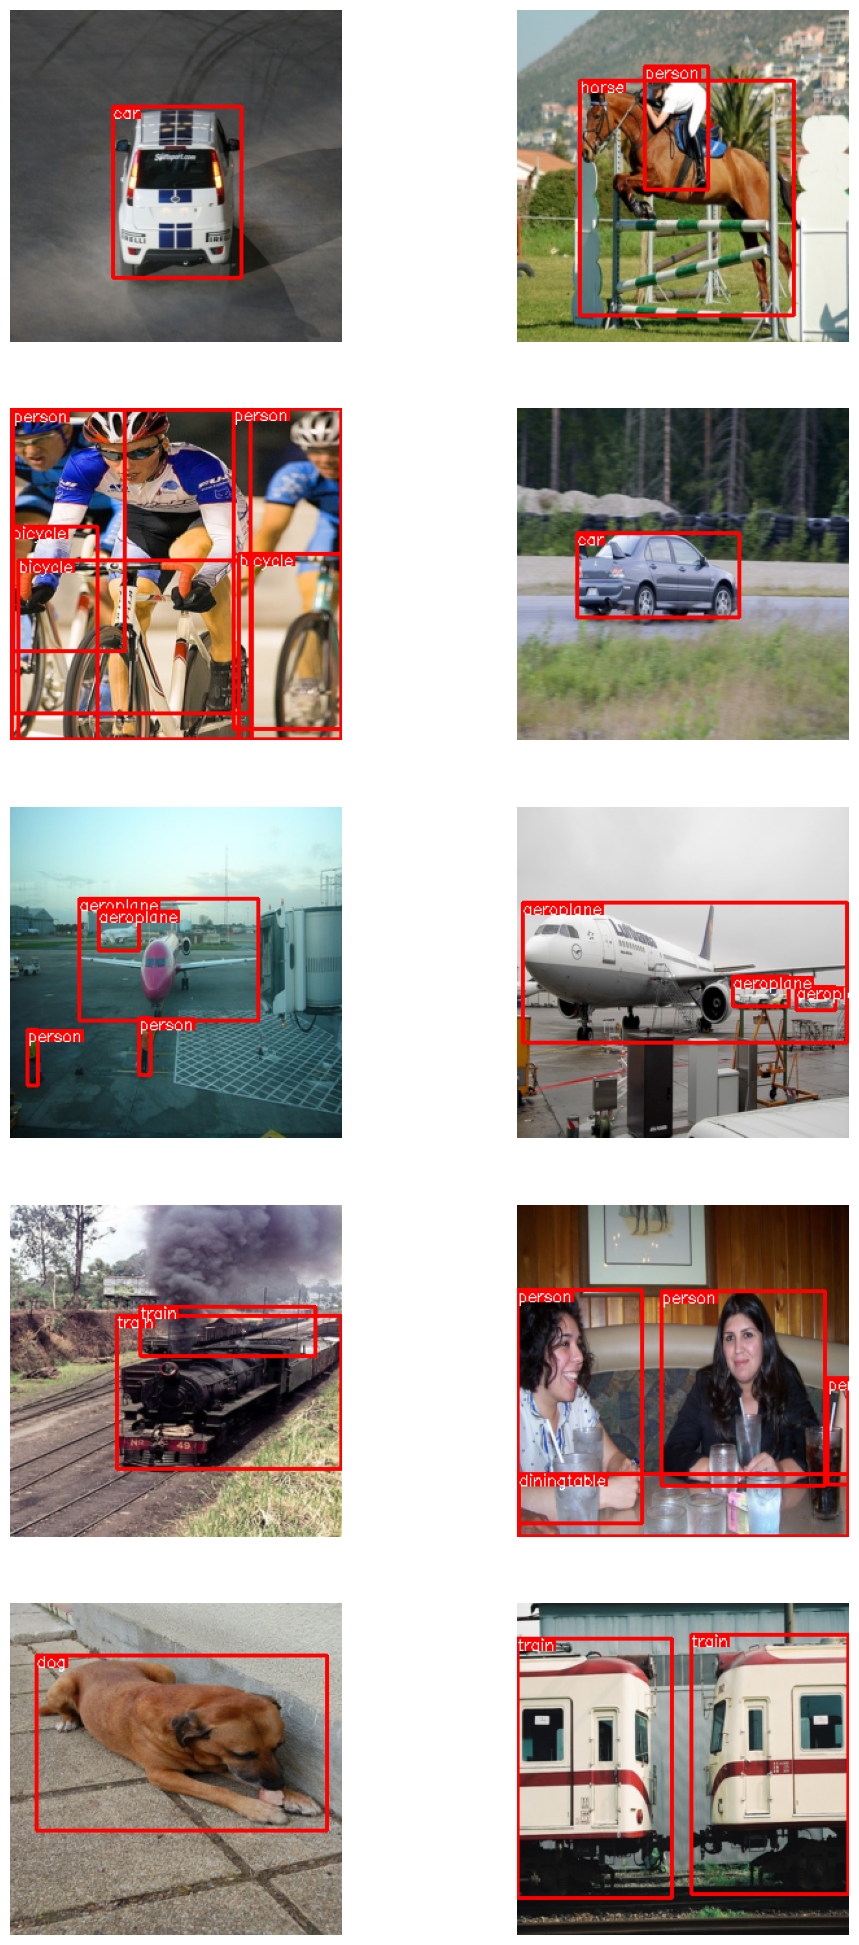

In [1]:
from matplotlib import pyplot as plt

import torch
import torchvision
import torchvision.transforms.v2 as transforms
from torch.utils import data

from models.centernet import input_height, input_width
from utils.tmp_visualizer import get_image_with_bboxes

transform_resize = transforms.Compose(
    [transforms.Resize(size=(input_width, input_height))]
)

dataset_val = torchvision.datasets.VOCDetection(
    root="../VOC", year="2007", image_set="train", download=False
)
dataset_val = torchvision.datasets.wrap_dataset_for_transforms_v2(dataset_val)

person_images = iter(torch.utils.data.Subset(dataset_val, range(10)))

plt.rcParams["figure.figsize"] = (12.0, 25.0)

# Visualize first 10 images from the dataset.
# They form my test data.
for y in range(2):
    for i in range(5):
        plt_idx = i + y * 5 + 1
        plt.subplot(5, 2, plt_idx)

        img, lbl = next(person_images)
        img_transformed, bboxes, labels = transform_resize(
            img,
            lbl["boxes"],
            lbl["labels"],
        )

        image_with_boxes = get_image_with_bboxes(img_transformed, bboxes, labels)
        plt.imshow(image_with_boxes)

        plt.axis("off")
plt.show()